In [14]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import visualkeras
import matplotlib.pyplot as plt
%matplotlib inline

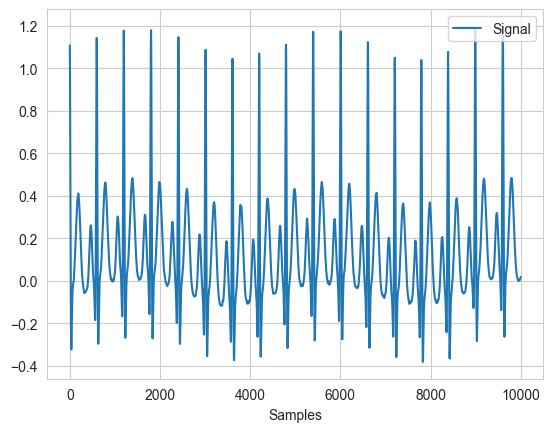

In [15]:
ecg100 = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)

ecg_df = pd.DataFrame({"ECG_100": ecg100})

nk.signal_plot(ecg100)


In [16]:
print(ecg_df)

       ECG_100
0     1.107303
1     1.101487
2     1.087355
3     1.064948
4     1.034780
...        ...
9995  0.013968
9996  0.015001
9997  0.016056
9998  0.017119
9999  0.018181

[10000 rows x 1 columns]


In [17]:
from keras.layers import Input, Dense
from keras.models import Model

In [28]:
from keras.layers import Input, Dense

def create_and_train_autoencoder(input_data, epochs=100, batch_size=32):    
    input_layer = Input(shape=(1,))
    
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(16, activation='relu')(encoded)
    
    bottleneck = Dense(8, activation='relu')(encoded)
    
    decoded = Dense(16, activation='relu')(bottleneck)
    decoded = Dense(32, activation='relu')(decoded)
    decoded = Dense(64, activation='relu')(decoded)
    
    output_layer = Dense(1, activation='linear')(decoded)

    autoencoder = Model(input_layer, output_layer)
        
    autoencoder.compile(optimizer='adam', loss='mse')

    history = autoencoder.fit(input_data, input_data, epochs=epochs, batch_size=batch_size, shuffle=True, validation_split=0.3)

    encoded_data = autoencoder.predict(input_data)
    
    autoencoder.save('model.h5')
    
    return history, encoded_data, autoencoder


In [19]:
ecg_100_data = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)

In [29]:
history, encoded_ecg_100, autencoder = create_and_train_autoencoder(ecg_100_data)

Epoch 1/100
219/219 [==============================] - 0s 903us/step - loss: 0.0053 - val_loss: 1.4723e-05
Epoch 2/100
219/219 [==============================] - 0s 680us/step - loss: 3.6647e-06 - val_loss: 7.9251e-07
Epoch 3/100
219/219 [==============================] - 0s 694us/step - loss: 1.1993e-06 - val_loss: 1.6291e-06
Epoch 4/100
219/219 [==============================] - 0s 681us/step - loss: 1.1979e-06 - val_loss: 5.0340e-06
Epoch 5/100
219/219 [==============================] - 0s 675us/step - loss: 3.5133e-06 - val_loss: 3.0427e-07
Epoch 6/100
219/219 [==============================] - 0s 679us/step - loss: 5.8239e-07 - val_loss: 9.1230e-08
Epoch 7/100
219/219 [==============================] - 0s 689us/step - loss: 8.2996e-07 - val_loss: 8.1933e-07
Epoch 8/100
219/219 [==============================] - 0s 677us/step - loss: 3.6640e-05 - val_loss: 1.6217e-06
Epoch 9/100
219/219 [==============================] - 0s 716us/step - loss: 1.2312e-06 - val_loss: 2.0359e-07
Epoch

/Users/palhares/opt/anaconda3/envs/ecg-embeddings/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:

train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
print(f'Training Loss: {train_loss:.4f}')
print(f'Validation Loss: {val_loss:.4f}')

Training Loss: 0.0000
Validation Loss: 0.0000


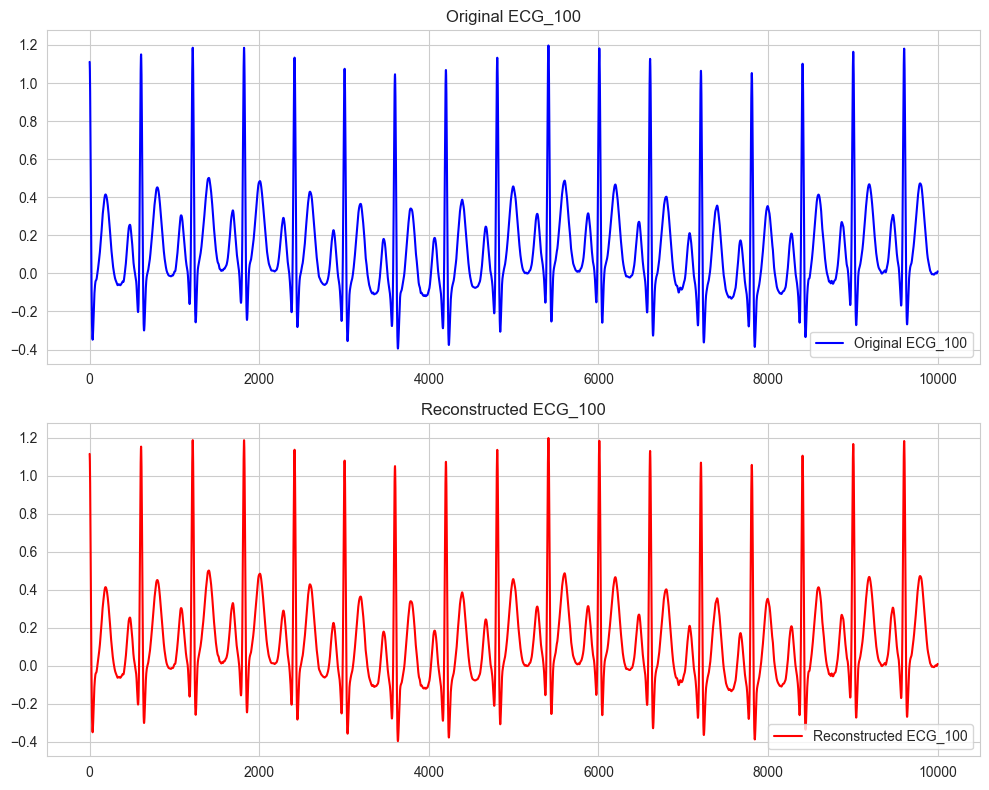

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].plot(ecg_100_data, label='Original ECG_100', color='blue')
axes[0].set_title('Original ECG_100')
axes[0].legend()

axes[1].plot(encoded_ecg_100, label='Reconstructed ECG_100', color='red')
axes[1].set_title('Reconstructed ECG_100')
axes[1].legend()

plt.tight_layout()
plt.show()